In [1]:
#Importing all the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#including the big_mart datset

df = pd.read_csv("big_mart.csv")

In [3]:
df.head() #printing the first 5 rows of dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#checking the missing values

df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
#Replacing all the missing values of column 'Item_Weight' by mean of all the weights in the same column.

df['Item_Weight'].fillna((df['Item_Weight'].mean()), inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
#Replacing all the missing values of column 'Outlet_Size' by mode of all the size in the same column.

df['Outlet_Size'].fillna((df['Outlet_Size'].mode()[0]), inplace=True)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [7]:
#Replacing the miscoded values

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat': 'Low Fat','reg': 'Regular'})
print('Modified Categories:')
print(df['Item_Fat_Content'].value_counts())

Modified Categories:
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


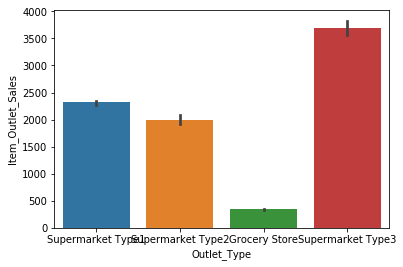

In [8]:
#Exploratry Data Analysis
#Barplot of Outlet_Type against Item_Outlet_Sales

sns.barplot(x="Outlet_Type", y="Item_Outlet_Sales", data=df)
#This bar plot shows that Supermarket type3 has highest Item oulet sales

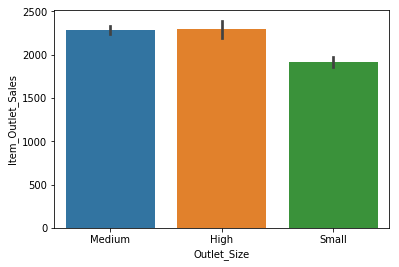

In [9]:
#Barplot of Outlet_Size against Item_Outlet_Sales

sns.barplot(x="Outlet_Size", y="Item_Outlet_Sales",data= df)
#This bar plot shows that the store with small ground area has less outlet sales wrt stores with large ground area.

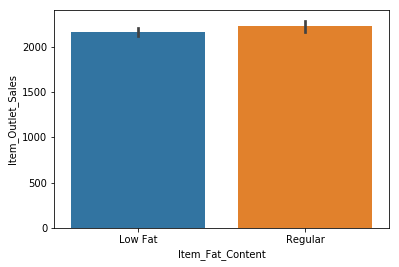

In [10]:
#Barplot of Item_Fat_Content against Item_Outlet_Sales

sns.barplot(x="Item_Fat_Content", y="Item_Outlet_Sales",data= df)
#This bar plot shows that Item_outlet_sales does not depend much on Item_Fat_Content

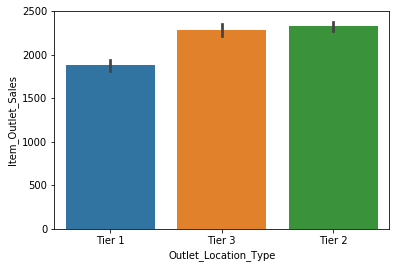

In [11]:
#Barplot of Outlet_Location_Type against Item_Outlet_Sales

sns.barplot(x="Outlet_Location_Type", y="Item_Outlet_Sales",data= df)
#This bar plot shows that the city with type Tier 2 has highest Item_Outlet_Sales

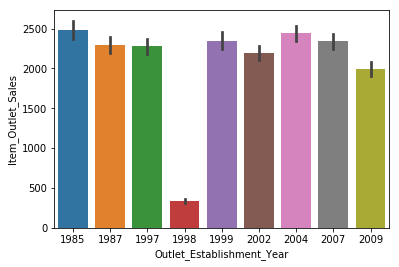

In [12]:
sns.barplot(x="Outlet_Establishment_Year", y="Item_Outlet_Sales",data= df)

#This shows that the store which is established in year 1998 has lowest item outlet sales

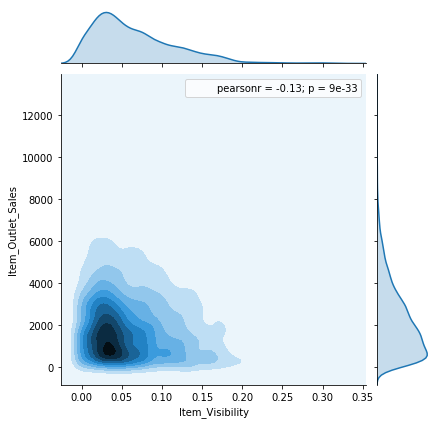

In [13]:
#Kernel density estimation graph in which Item_Visibility is shown against Item_Outlet_Sales

sns.jointplot(x=df['Item_Visibility'], y=df['Item_Outlet_Sales'], kind="kde")

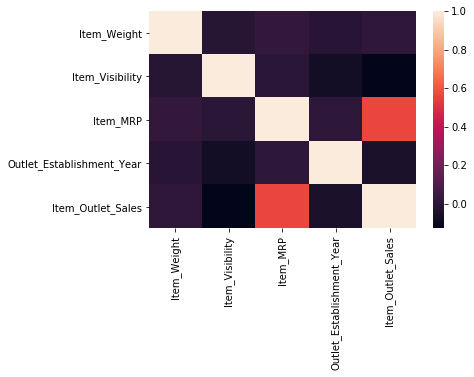

In [14]:
#multivariate analysis
cor_mat=df.corr()
sns.heatmap(cor_mat)

#This is a correlation matrix graph.

In [15]:
#To convert categorical features to numericalfeatures

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type','Outlet_Type']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [16]:
#feature engineering

li = list(set(df.columns)-set(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']))
x = df[li]
y = df['Item_Outlet_Sales']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)


In [17]:
#Using Linear Regression Model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
df1 = pd.DataFrame({'Actual':y_test,"Predicted":y_pred})
df1

,Actual,Predicted
4931,1426.1436,2328.140455
4148,1201.7690,2491.126450
7423,1836.2764,1991.561845
4836,2410.8618,2222.098834
944,1549.9824,2810.434870
154,3169.2080,3501.522483
7230,2036.6822,2733.050887
3472,824.9262,1741.248657
2294,378.1744,1404.288377
2588,1573.9512,2491.085036


In [18]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

#The higher the R-squared, the better the model fits your data.

0.5074036825751513
